## LAB05 Assignment  
> 11912911 张子越


This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

- <font size=4> Step 2. Define the features and the target </font>

In [2]:
X = iris.data[:,2:]  # type: ignore
y = iris.target  # type: ignore

- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.


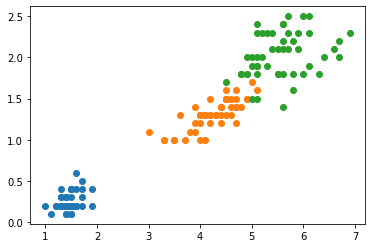

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [4]:
########### Write Your Code Here ###########
len(X)
############################################

150

- <font size=4> Step 4. Preprocessing data </font>
Please check whether the data needs to be preprocessed

In [5]:
########### Write Your Code Here ###########



############################################

- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [6]:
########### Write Your Code Here ###########

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)

############################################

- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

The decision tree model  given by the `SkLearn`  is as follows:

```python
DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```
There are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance.  
Adjust these parameters: `criterion`,`max_depth`, `min_samples_leaf`,  `min_samples_split` , `max_leaf_nodes `,`min_impurity_split `
and explain how it affects the bias and variance of the classification results. 

[Link to sklearn doc about DecisionTreeClasssifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [7]:
########### Write Your Code Here ###########

from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp

x_labels = []
model_list = []
expected_losses = []
avg_biases = []
avg_vars = []

def try_parameters(criterion:str='gini', 
                   max_depth=None, 
                   min_samples_split=2, 
                   min_samples_leaf=1, 
                   max_leaf_nodes=None, 
                   min_impurity_decrease=0.0, 
                   ccp_alpha=0.0, 
                   label:str='1') :

    DTC = DecisionTreeClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_leaf_nodes=max_leaf_nodes, 
        min_impurity_decrease=min_impurity_decrease, 
        ccp_alpha=ccp_alpha, 
        random_state=123
        )

    DTC.fit(X_train, y_train)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(DTC, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)

    x_labels.append(label)
    model_list.append(DTC)
    expected_losses.append(round(avg_expected_loss, 4))
    avg_biases.append(round(avg_bias, 4))
    avg_vars.append(round(avg_bias, 4))

try_parameters(label='default')

############################################

In [8]:
try_parameters(criterion='entropy', label='entropy')

try_parameters(max_depth=2, label='max_depth=2')
try_parameters(max_depth=3, label='max_depth=3')
try_parameters(max_depth=4, label='max_depth=4')

try_parameters(min_samples_split=30, label='m_s_split=30') # same as max_depth=3 when <= 0.3, otherwise bad
try_parameters(min_samples_split=35, label='m_s_split=35')
try_parameters(min_samples_split=40, label='m_s_split=40')

try_parameters(min_samples_leaf=2, label='m_s_leaf=2')
try_parameters(min_samples_leaf=3, label='m_s_leaf=3')
try_parameters(min_samples_leaf=4, label='m_s_leaf=4')

# 2 explodes
try_parameters(max_leaf_nodes=4, label='m_l_nodes=4')
try_parameters(max_leaf_nodes=5, label='m_l_nodes=5')
try_parameters(max_leaf_nodes=6, label='m_l_nodes=6')

try_parameters(min_impurity_decrease=0.005, label='m_i_decrease=.005')
try_parameters(min_impurity_decrease=0.01, label='m_i_decrease=.01')
try_parameters(min_impurity_decrease=0.05, label='m_i_decrease=.05')

try_parameters(ccp_alpha=0.01, label='ccp_alpha=.01')
try_parameters(ccp_alpha=0.02, label='ccp_alpha=.02')
try_parameters(ccp_alpha=0.025, label='ccp_alpha=.025')

try_parameters(max_depth=3, 
               min_samples_split=35,
               min_samples_leaf=3,
               max_leaf_nodes=5, 
               min_impurity_decrease=0.01,
               ccp_alpha=0.02,
               label='best_each')

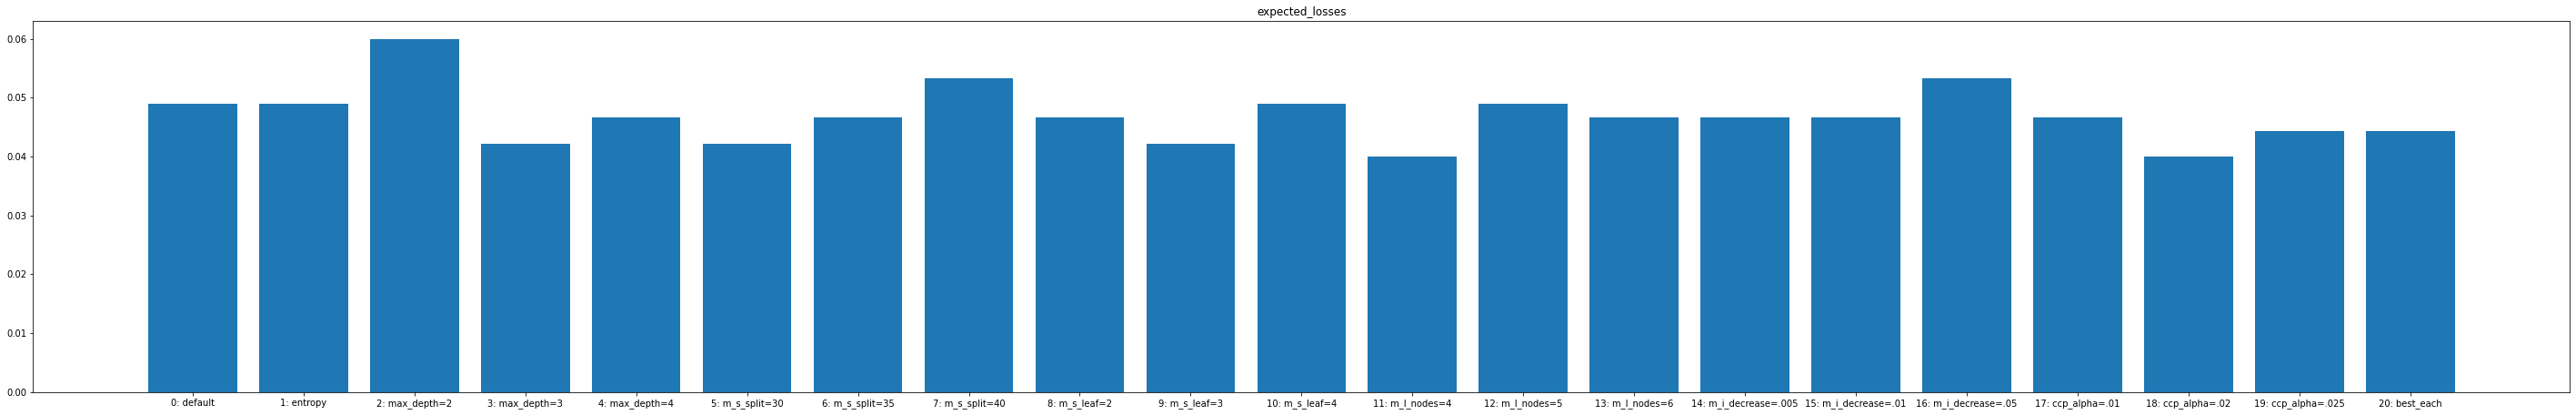

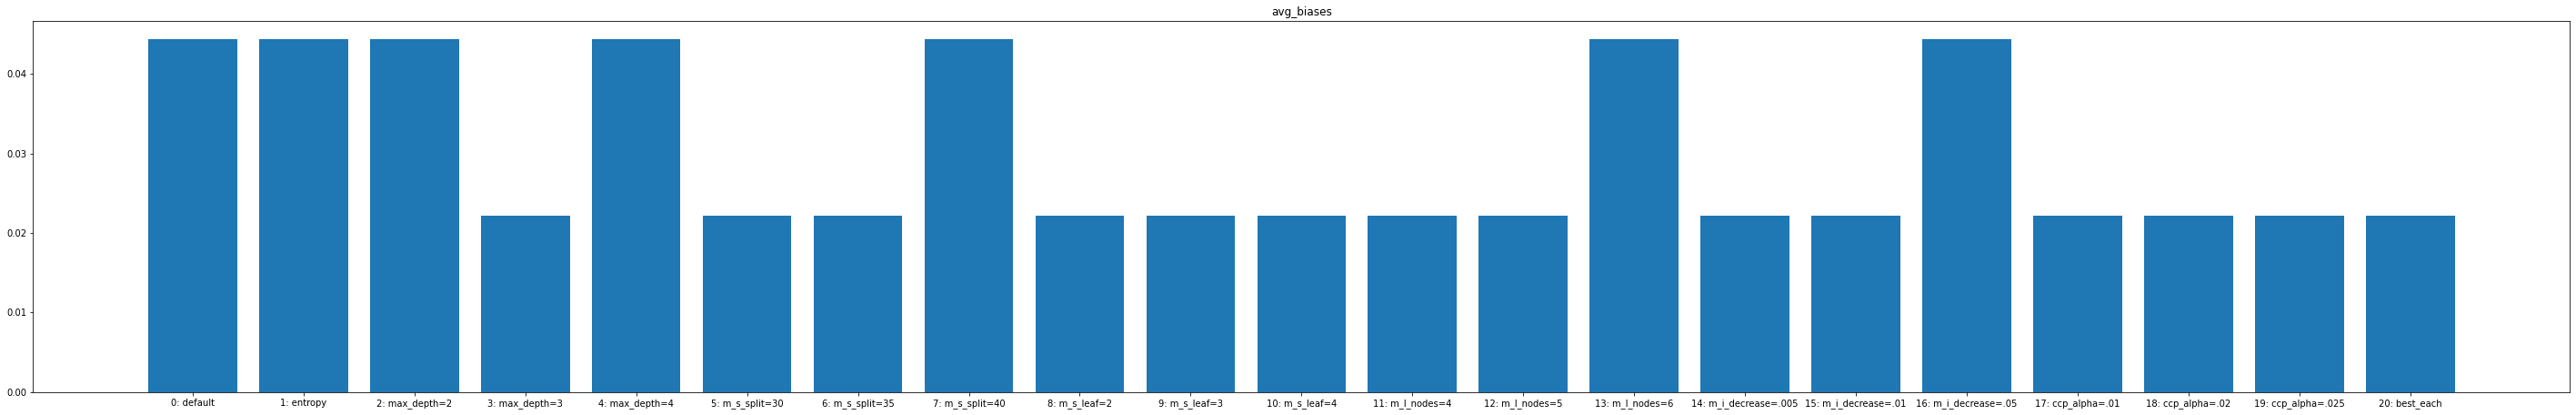

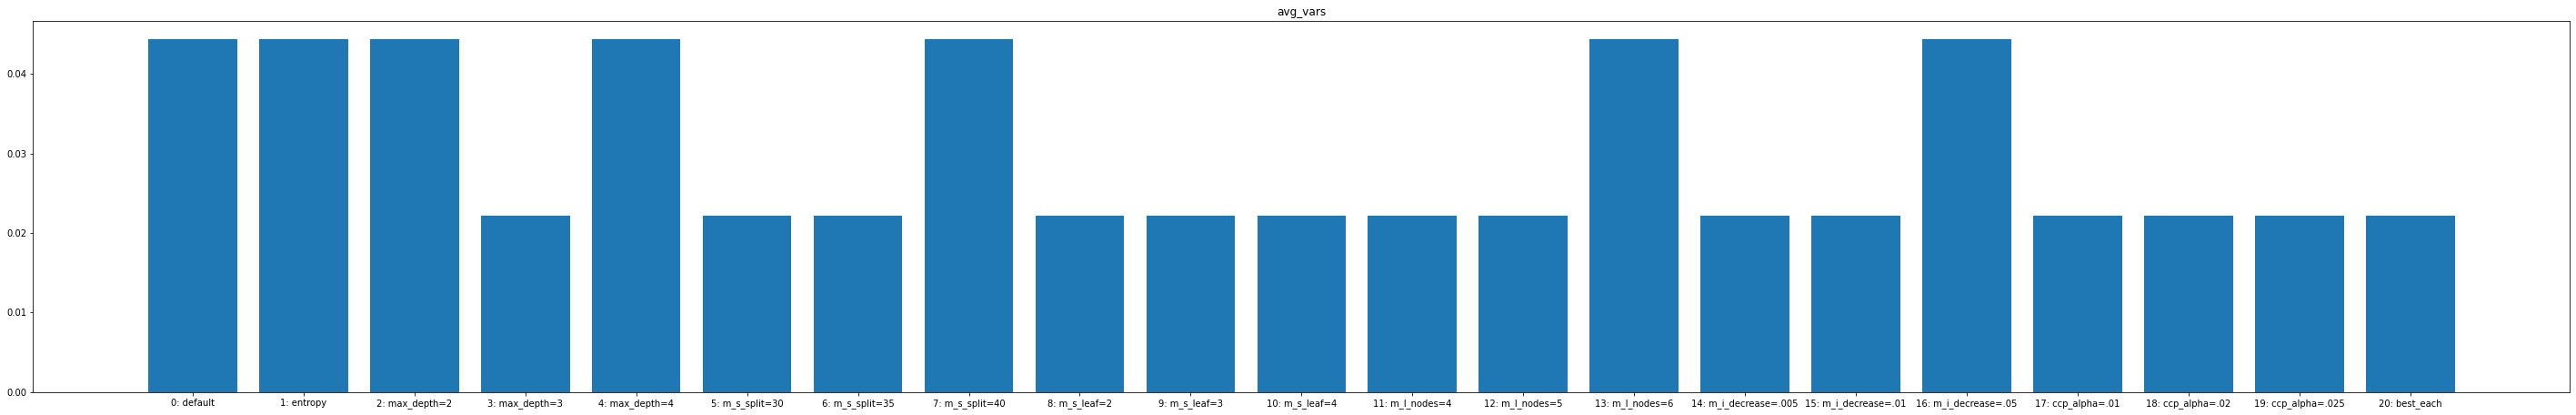

In [9]:
x = np.arange(len(x_labels))
x_labels_ = [f'{i}: {label}' for i, label in enumerate(x_labels)]
figsize = (50, 7.5)

plt.figure(figsize=figsize)
plt.title(label='expected_losses')
plt.xticks(x, x_labels_)
plt.bar(x, expected_losses)
plt.show()

plt.figure(figsize=figsize)
plt.title(label='avg_biases')
plt.xticks(x, x_labels_)
plt.bar(x, avg_biases)
plt.show()

plt.figure(figsize=figsize)
plt.title(label='avg_vars')
plt.xticks(x, x_labels_)
plt.bar(x, avg_vars)
plt.show()

#### Comparison: 

![](1.0_expected_losses.png)


![](1.1_avg_biases.png)


![](1.2_avg_vars.png)


`criterion`: 
The function of quality measuremt of a split, for example 'gini' and 'log_loss'/'entropy'. 'gini' is a estimation, and 'log_loss' calculates the entropy loss. The prior one is faster since it is easier to calculate, but the score is similar according to the test. 

`max_depth`: 
This argument indicates the maximum depth of the tree, default is None, showing that there is no limits. Tuning this arg can prevent model from overfitting. 

`min_samples_leaf`: 
This arg indicates the minimum leaf num required to form a leaf node. This can help prevent the split point from generating too many alike splits. 

`min_samples_split`: 
This arg indicates the minimum samples required to split an internal node. In the tests above, the loss grows as the arg is higher, when the number reaches 40, the bias and var skyrocket.


`max_leaf_nodes`: 
limitations of the leaf_nodes. Tuning this arg shows too many leafs will increase the loss, bias, and var. 


`min_impurity_split`: 
The threshold of impurity required to plit the node. If higher, nodes are more unlikely to split, hence the loss is higher (when testing 0.005, 0.01, 0.05). 

Finally, select the best set of parameters for the following steps.

- <font size=4> Step 7. Use the model of your choice on the test set </font>


In [10]:
########### Write Your Code Here ###########
DTC = model_list[11]

y_pred = DTC.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

############################################

0.9777777777777777

- <font size=4> Step 8. Evaluate the model </font>

In [11]:
########### Write Your Code Here ###########

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(DTC, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)

print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

############################################

Average Expected Loss: 0.04n
Average Bias: 0.0222
Average Variance: 0.0178


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

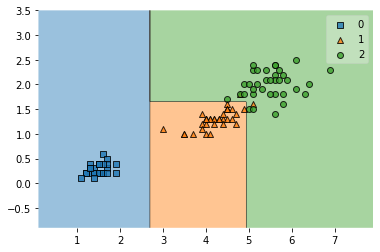

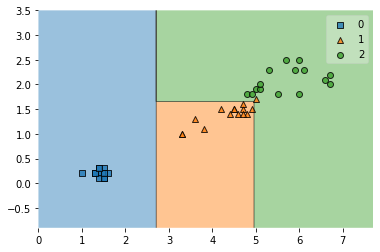

In [12]:
########### Write Your Code Here ###########

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=DTC)

plt.show()

plot_decision_regions(X_test, y_test, clf=DTC)

plt.show()

############################################

### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>
Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively, 

- <font color=blue >**RF view:**</font> we construct a RF class directly.
  
```python
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)
```

- <font color=blue face=雅黑>**Bagging view:**</font>  we use the bagging algorithm with a number of base learning algorithms of decision trees.
  
```python
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)
```

- Compare the performances of two  methods, and select different parameters for model  and evaluate the model using bias and variance




In [ ]:
########### Write Your Code Here ###########

############################################

### Other ensemble learning
For classification, we have many models to choose . Please don't just pick a model to train and say it's good enough. We need to select models based on some metrics, such as choosing models with low bias and low variance.

In this part, you are required  to use `AdaBoost` and `Gradient boosting`.Compare their performances with decision tree and random forest, and finally select the best model  and the optimal  parameters for iris classification.




In [ ]:
########### Write Your Code Here ###########

############################################


<font size=4>Hint: About how to select models and parameters:</font>
- Select model using cross validation. Compare the scores in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.
- Select parameters using cross validation
  
### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.
- There are many arguments for either base decision trees or the whole ensemble algorithm.  A good ensemble algorithm should make sure that base ones are both accurate and diversified.  So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. 

## References
https://scikit-learn.org/stable/